In [41]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [144]:
df = pd.read_csv('../data/nutritional_values.csv')
recetas = pd.read_csv('../data/output.csv',sep='|')
ing = pd.read_csv('../data/ingredients_100.csv')
ing_raw = pd.read_csv('../data/ingredientes.csv',sep='|')

In [146]:
df['Total_Grams'].describe()

count      7193.000000
mean       3726.990129
std       18647.383991
min           0.000000
25%         393.000000
50%         775.000000
75%        1425.000000
max      750501.000000
Name: Total_Grams, dtype: float64

In [160]:
df.sort_values(['Total_Grams'], ascending=False).head(15)

,Recipe_id,alcohol (etanol),"energía, total","grasa, total (lipidos totales)","proteina, total",agua (humedad),"fibra, dietetica total",carbohidratos,ácido graso 22:6 n-3 (ácido docosahexaenóico),"ácidos grasos, monoinsaturados totales",...,calcio,"hierro, total",potasio,magnesio,sodio,fósforo,ioduro,"selenio, total",zinc (cinc),Total_Grams
2778,38438,68250.000,525182.32,2.52100,1503.604000,669448.1700,11.26200,11285.4240,0.00000,0.32290,...,75.127660,6.004143,360.950730,45.060900,30.010050,52.631760,0.000115,0.000000,0.000511,750501.0
1364,23115,0.000,783518.21,16601.32075,42934.742500,113157.4340,3580.35400,113043.8490,6.40000,5366.13775,...,40.861890,2.117678,855.769250,70.136500,142.365790,602.049240,0.013706,0.017057,1.990694,292466.0
7090,73828,0.000,409680.06,7629.34180,83958.297250,189204.5508,41.40700,181.5410,0.04000,1805.48955,...,31.348728,3.946910,756.002150,59.306036,438.351910,478.378300,0.005722,0.062838,5.896717,282574.0
1799,27844,13.068,406920.50,7467.46600,83730.245000,187907.1800,7.68000,62.7120,0.00000,1726.94020,...,30.919340,3.922021,748.300780,58.858160,436.825900,476.343960,0.005658,0.062732,5.881128,280742.0
1754,27644,0.000,407409.64,7515.50200,83821.058000,187789.3450,3.01400,9.7480,0.02000,1742.66580,...,30.900340,3.924347,749.144410,58.913150,438.383750,476.870460,0.005661,0.062772,5.885382,280695.0
2761,38148,0.000,403662.91,23170.15610,47880.027125,169945.9230,33.61100,885.9130,9.60000,7598.92730,...,32.718864,1.762211,633.464280,46.041143,205.675316,399.453880,0.016686,0.024015,2.397812,241970.0
294,8693,0.000,354304.44,20501.66400,42327.814250,150782.4725,47.01875,68.3995,8.49416,6750.67674,...,28.539915,1.566509,562.860005,41.122573,180.176926,352.407727,0.014705,0.021276,2.128916,213777.0
4177,53191,0.000,333811.81,19299.12670,39880.586375,141911.2600,16.37600,147.3790,8.00000,6332.53290,...,27.652992,1.508520,526.248240,38.242189,169.400350,331.218460,0.014167,0.020092,2.003137,201270.0
2187,30695,0.000,335852.15,19469.12300,39873.638300,141565.5040,25.92950,253.9997,8.00000,6384.02809,...,27.794750,1.950656,531.389750,38.639971,167.951235,332.374259,0.013867,0.020042,2.006785,201208.0
4739,56737,0.000,332777.47,19251.80690,39810.351125,141491.0820,8.63600,67.2910,8.00000,6331.88290,...,26.076754,1.463493,526.306530,38.089403,166.769730,330.227200,0.013821,0.020008,1.993518,200633.0


In [162]:
ing[ing['Recipe_id']==38438]

,Recipe_id,Ingrediente,Cantidad,Unidad,Indice,Grams,Total_Grams,Num_comensales
39133,38438,cava,750.0,botella,780,1000.0,750000.0,1.0
39134,38438,fresa,500.0,gramos,689,1.0,500.0,1.0
39135,38438,pimienta,1.0,pizca,901,1.0,1.0,1.0


In [137]:
print(recetas[recetas['Id']==23115]['Ingredientes'])

8102    400 gr de pechuga de pollo,1 pimiento verde o ...
Name: Ingredientes, dtype: object


In [140]:
ing[ing['Recipe_id']==7167]

,Recipe_id,Ingrediente,Cantidad,Unidad,Indice,Grams,Total_Grams,Num_comensales
7702,7167,arroz,500.0,tazas,428,150.0,75000.0,1.0
7703,7167,cebolla,1.0,unidad,610,100.0,100.0,1.0
7704,7167,ajo,2.0,dientes,587,3.0,6.0,1.0
7705,7167,laurel,3.0,hojas,885,4.0,15.0,1.0
7706,7167,jamón cocido,200.0,gr,202,1.0,200.0,1.0
7707,7167,queso,300.0,gr,77,1.0,300.0,1.0
7708,7167,tomate,500.0,unidad,667,150.0,75000.0,1.0
7709,7167,pimienta,NaN,None,901,2.0,2.0,1.0
7710,7167,perejil,NaN,None,899,32.0,42.0,1.0
7711,7167,aceite de oliva,NaN,None,410,42.0,60.0,1.0


In [115]:
macros = df[['energía, total',
       'grasa, total (lipidos totales)', 'proteina, total',
       'fibra, dietetica total', 'carbohidratos']].copy()
macros.head()

,"energía, total","grasa, total (lipidos totales)","proteina, total","fibra, dietetica total",carbohidratos
0,0.00,0.0000,0.0000,0.000,0.0000
1,177.45,4.6032,10.2882,2.692,22.8661
2,44.95,0.3741,2.3100,4.227,7.9070
3,387.10,1.6820,10.5550,8.750,81.0050
4,1642.66,152.6620,12.2830,5.408,58.0880


In [125]:
clusters = 4

pipe = Pipeline([('scaler', StandardScaler()),('cluster',cluster.KMeans(n_clusters=clusters))])
macros['cluster'] = pipe.fit_predict(macros)

In [126]:
def print_cluster_stats(df, clusters):
    print('Items per cluster: ')
    items_cluster = [len(df[df['cluster']==cluster]) for cluster in range(clusters)]
    print(items_cluster)

In [127]:
print_cluster_stats(macros, clusters)

Items per cluster: 
[7094, 64, 2, 33]


In [129]:
macros[macros['cluster']==2]

,"energía, total","grasa, total (lipidos totales)","proteina, total","fibra, dietetica total",carbohidratos,cluster
114,307180.60,995.10180,6032.04925,983.441,67141.830,2
1364,783518.21,16601.32075,42934.74250,3580.354,113043.849,2


In [139]:
df.iloc[114]['Recipe_id']

7167.0

In [87]:
macros.groupby('cluster')['energía, total'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,2569.379350,6186.334324,0.00,535.855,1135.280,2291.8850,117404.80
1,63.0,229469.272857,91787.695339,132838.83,166431.505,203555.340,315945.5250,525182.32
2,2836.0,3482.280765,7465.766173,0.00,686.910,1430.615,2778.9725,109472.56
3,30.0,86839.511667,142418.132389,8633.69,28908.490,57971.500,73635.6500,783518.21


In [88]:
macros.groupby('cluster')['grasa, total (lipidos totales)'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,135.427819,323.585479,0.000000,10.33620,50.488500,116.850250,5605.72400
1,63.0,11666.969944,5368.261560,2.521000,7685.42015,9708.479000,15404.170550,25005.01670
2,2836.0,183.406498,404.165334,0.000000,22.66785,78.878259,158.117475,9228.36790
3,30.0,911.768699,2968.182926,31.852794,261.50310,366.771318,470.508425,16601.32075


In [89]:
macros.groupby('cluster')['proteina, total'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,198.711079,932.881211,0.000000,14.440556,43.443750,96.952450,23977.041900
1,63.0,28681.153961,16384.831472,28.202375,15981.415937,24481.162525,39802.719000,83958.297250
2,2836.0,299.080127,1052.147133,0.000000,18.644781,51.658000,130.605375,20373.718125
3,30.0,3558.921705,7554.519288,373.503400,1300.672100,1893.415191,3324.441250,42934.742500


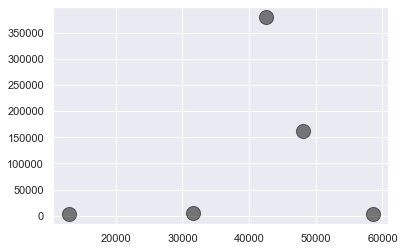

In [35]:
#plt.scatter(macros[:, 0], macros[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);